Number of Unique Values in Each Column:
age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


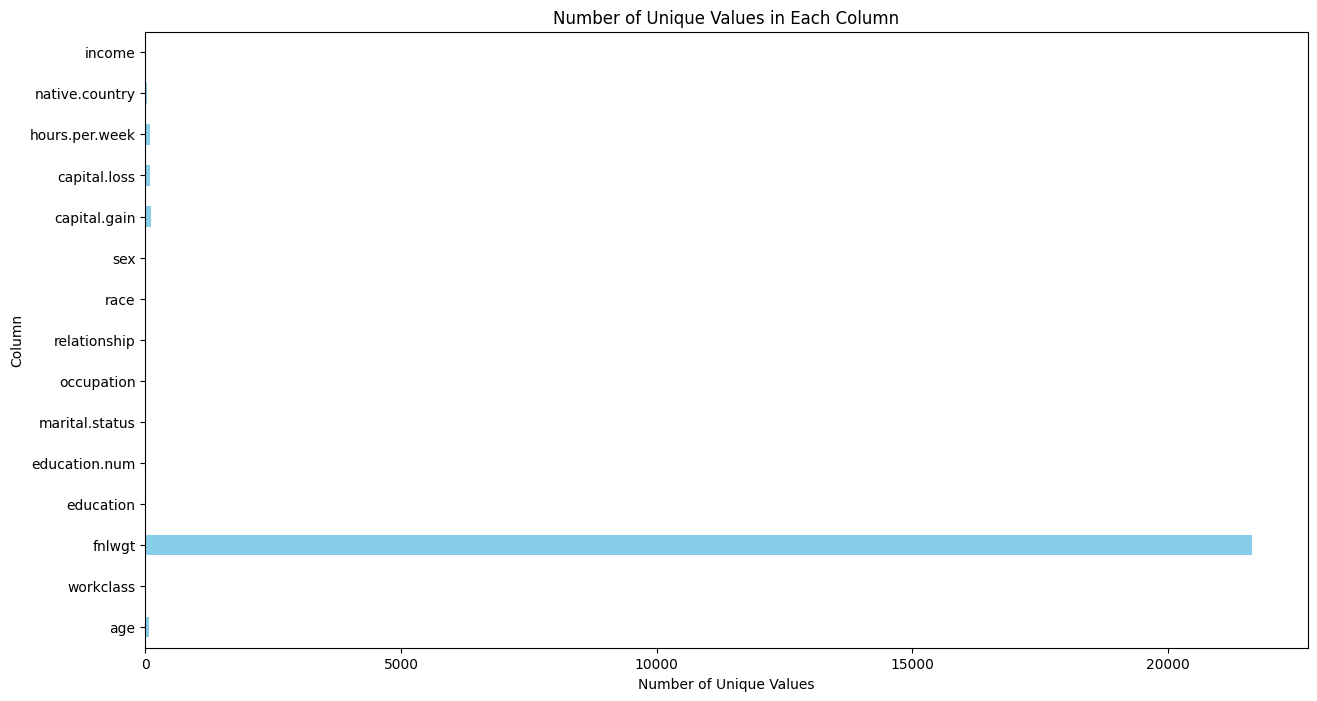

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv(r"/content/dataset5_adult.csv")
unique_values = df.nunique()
print("Number of Unique Values in Each Column:")
print(unique_values)
plt.figure(figsize=(15, 8))
unique_values.plot(kind='barh', color='skyblue')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Number of Unique Values')
plt.ylabel('Column')
plt.show()

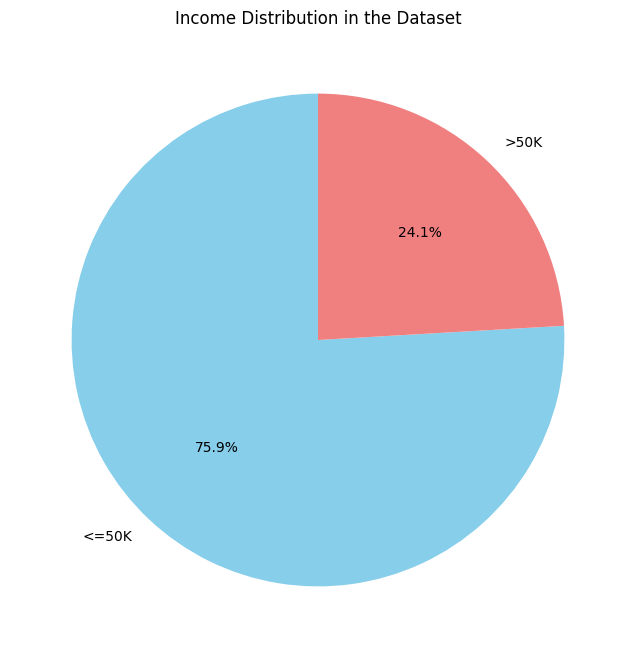

Proportion of individuals making more than $50,000 per year: 24.08%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"/content/dataset5_adult.csv")
income_distribution = df['income'].value_counts()



plt.figure(figsize=(8, 8))
plt.pie(income_distribution, labels=income_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Income Distribution in the Dataset')
plt.show()

proportion_high_income = income_distribution['>50K'] / df.shape[0]
print(f"Proportion of individuals making more than $50,000 per year: {proportion_high_income:.2%}")

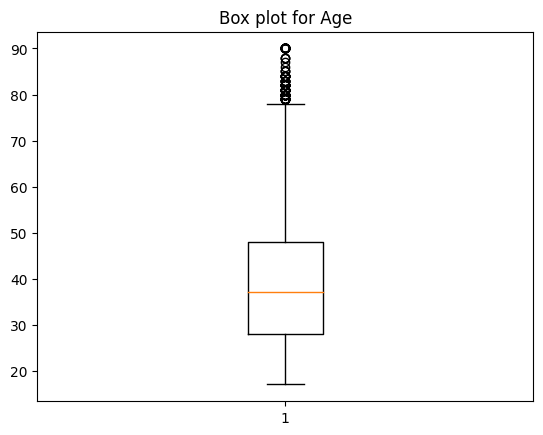

<ipython-input-32-bf2516d48140>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].str.lower()


   age  fnlwgt     education  education.num marital.status         occupation  \
0   63   77053       HS-grad              9        Widowed                  ?   
1   63  132870       HS-grad              9        Widowed    Exec-managerial   
2   63  186061  Some-college             10        Widowed                  ?   
3   54  140359       7th-8th              4       Divorced  Machine-op-inspct   
4   41  264663  Some-college             10      Separated     Prof-specialty   

    relationship   race     sex  capital.gain  ...  income  workclass_?  \
0  Not-in-family  White  female             0  ...   <=50K            1   
1  Not-in-family  White  female             0  ...   <=50K            0   
2      Unmarried  Black  female             0  ...   <=50K            1   
3      Unmarried  White  female             0  ...   <=50K            0   
4      Own-child  White  female             0  ...   <=50K            0   

  workclass_Federal-gov workclass_Local-gov  workclass_Never-w

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

df = pd.read_csv(r"/content/dataset5_adult.csv")


df = df.dropna(axis=1, thresh=0.9 * len(df))

plt.boxplot(df['age'])
plt.title('Box plot for Age')
plt.show()
df['age'] = winsorize(df['age'], limits=[0.05, 0.05])

numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns] = df[numerical_columns].astype(int)

df = df.drop_duplicates()

df['sex'] = df['sex'].str.lower()

df['native.country'] = df['native.country'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

df = pd.get_dummies(df, columns=['workclass'])

df.to_csv(r"C:\Users\Dell\dataset5_adult.csv", index=False)

print(df.head())

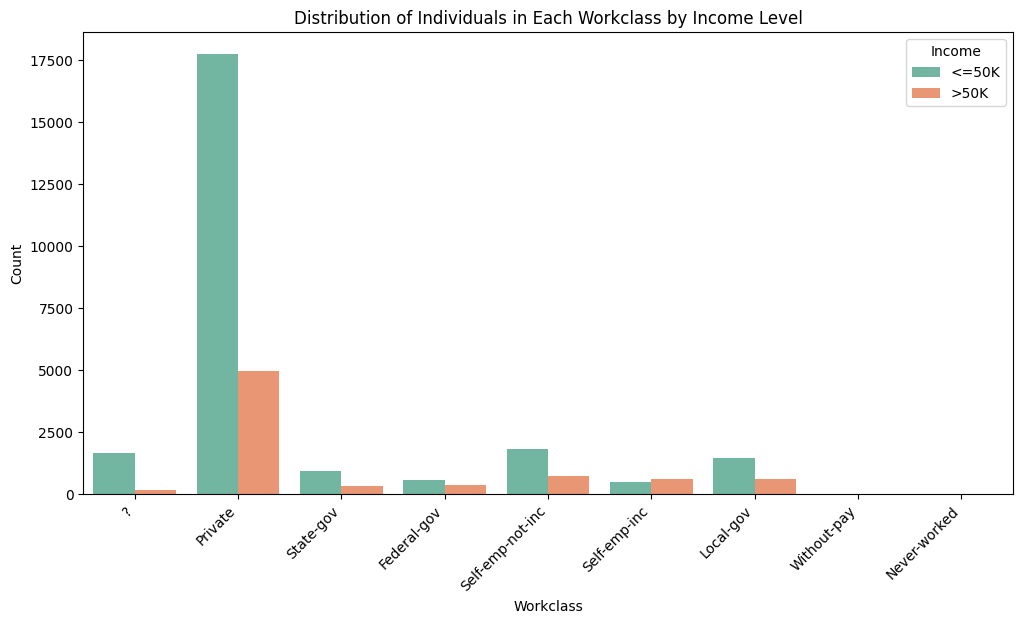

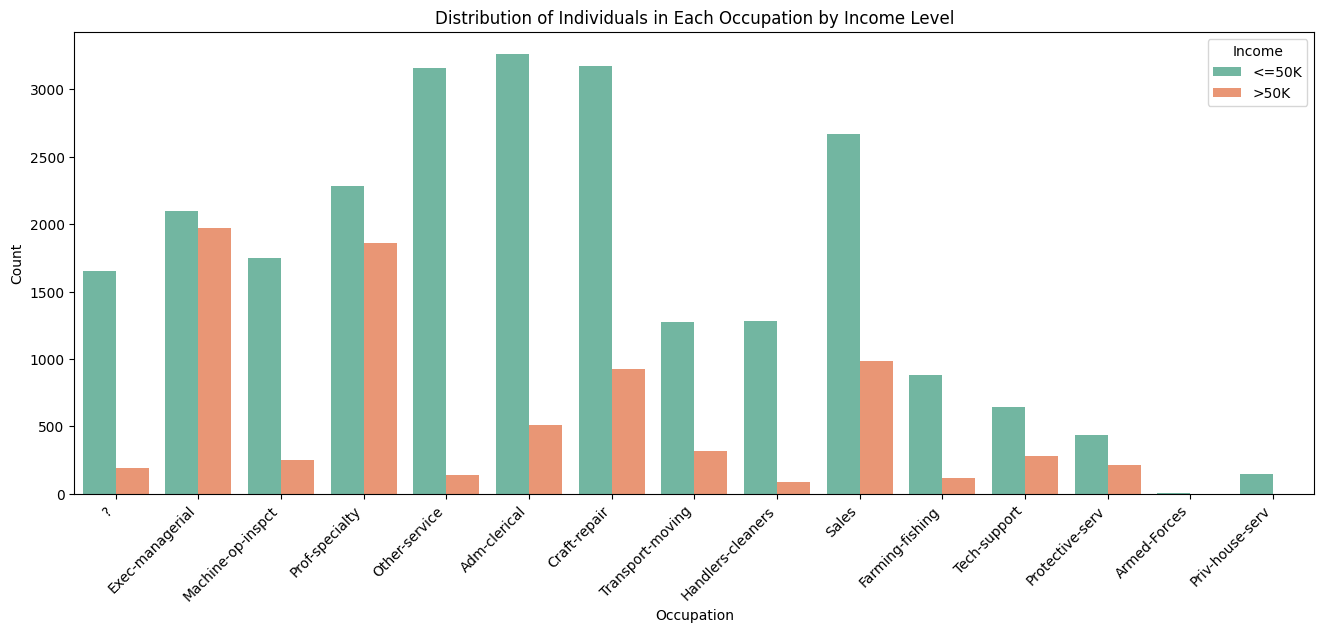

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'dataset5_adult.csv'
df = pd.read_csv(r"/content/dataset5_adult.csv")

df.head()

plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=df, palette='Set2')
plt.title('Distribution of Individuals in Each Workclass by Income Level')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.show()

plt.figure(figsize=(16, 6))
sns.countplot(x='occupation', hue='income', data=df, palette='Set2')
plt.title('Distribution of Individuals in Each Occupation by Income Level')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.show()

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

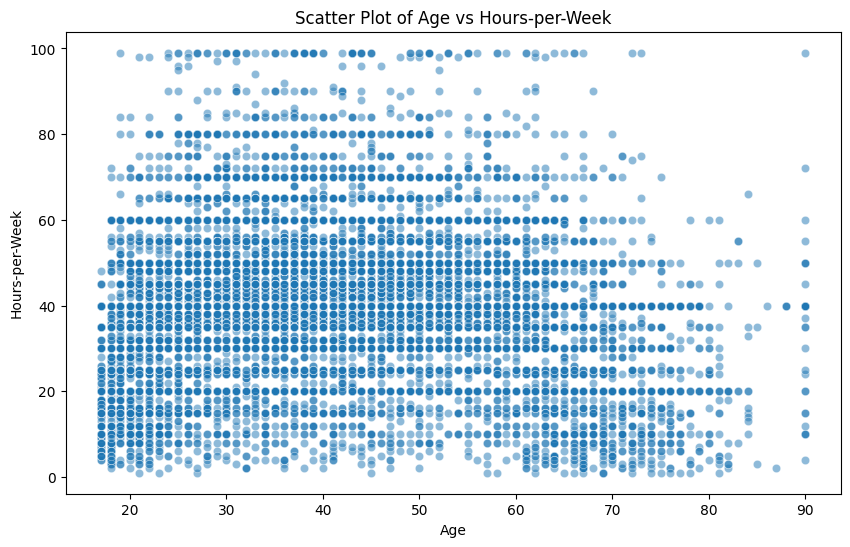

Correlation Coefficient: 0.06875570750955728


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'dataset5_adult.csv'
df = pd.read_csv(r"/content/dataset5_adult.csv")


print(df.head())

print(df.columns)

plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y=df['hours.per.week'], data=df, alpha=0.5)

plt.title('Scatter Plot of Age vs Hours-per-Week')
plt.xlabel('Age')
plt.ylabel('Hours-per-Week')
plt.show()

correlation_coefficient = df['age'].corr(df['hours.per.week'])
print(f'Correlation Coefficient: {correlation_coefficient}')

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

file_path = 'dataset5_adult.csv'
df = pd.read_csv(r"/content/dataset5_adult.csv")

df_subset = df.head(10)

target_column = 'capital.gain'


group1 = df_subset[df_subset[target_column] <= 50000]['capital.gain']
group2 = df_subset[df_subset[target_column] > 50000]['capital.gain']



t_statistic, p_value = ttest_ind(group1, group2)


print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest a difference in mean 'capital-gain' between the two income groups.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in mean 'capital-gain' between the two income groups.")

Test Statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in mean 'capital-gain' between the two income groups.


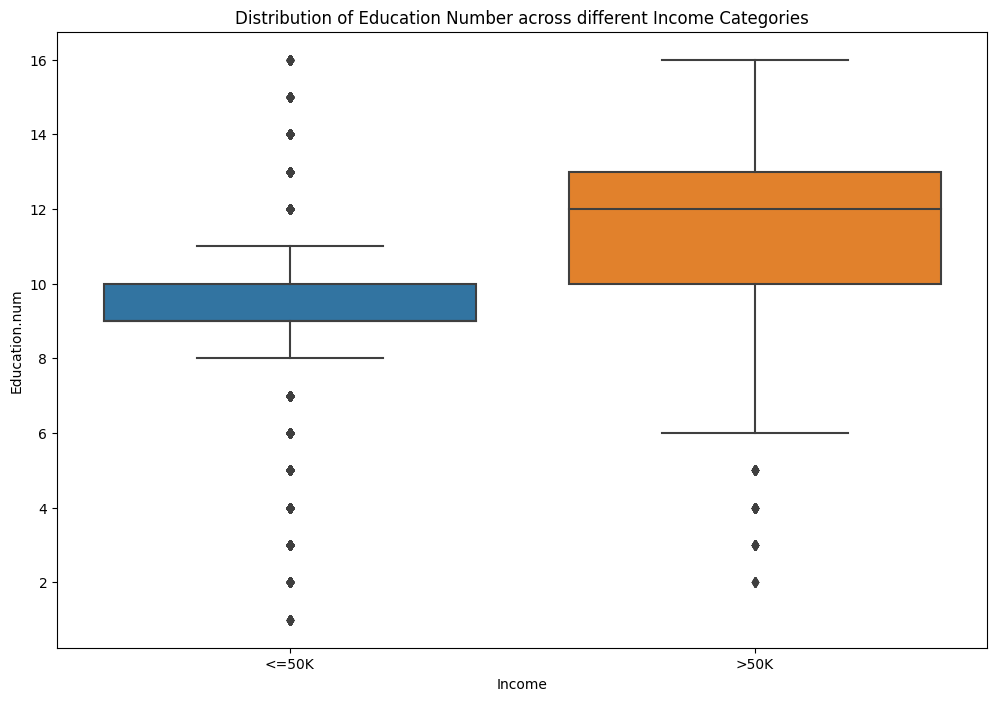

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplt

data_set = pd.read_csv(r"/content/dataset5_adult.csv")

plt.figure(figsize=(12, 8))
sb.boxplot(x='income', y='education.num', data=data_set)
plt.title('Distribution of Education Number across different Income Categories')
plt.xlabel('Income')
plt.ylabel('Education.num')
plt.show()

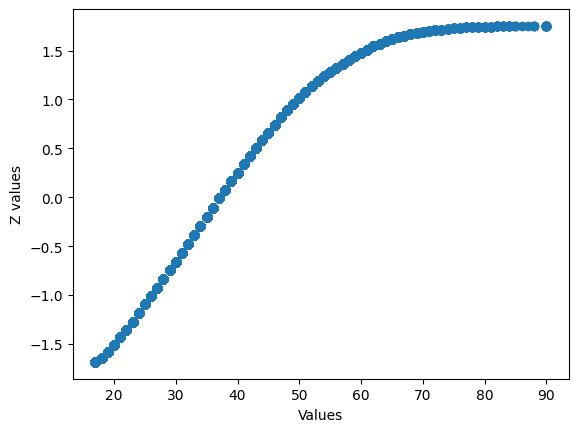

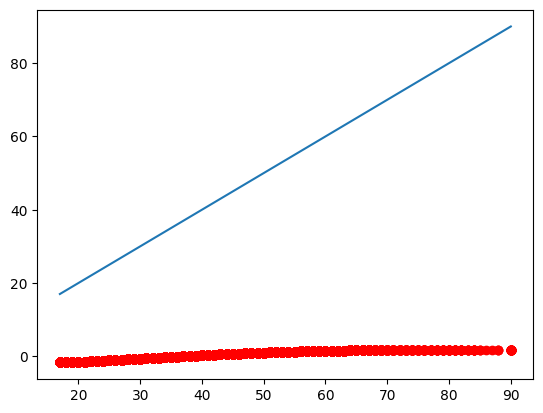

In [ ]:
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def npp(data):
    data = sorted(data)
    p = [(data.index(i) - 0.5) / len(data) for i in data]
    z = zscore(p)

    plt.scatter(data, z)
    plt.ylabel('Z values')
    plt.xlabel('Values')
    plt.show()

    plt.plot(data, z, 'ro', data, data)
    plt.show()

data = pd.read_csv(r"/content/dataset5_adult.csv")

age = 'age'
data_set = data[age].values
npp(data_set)


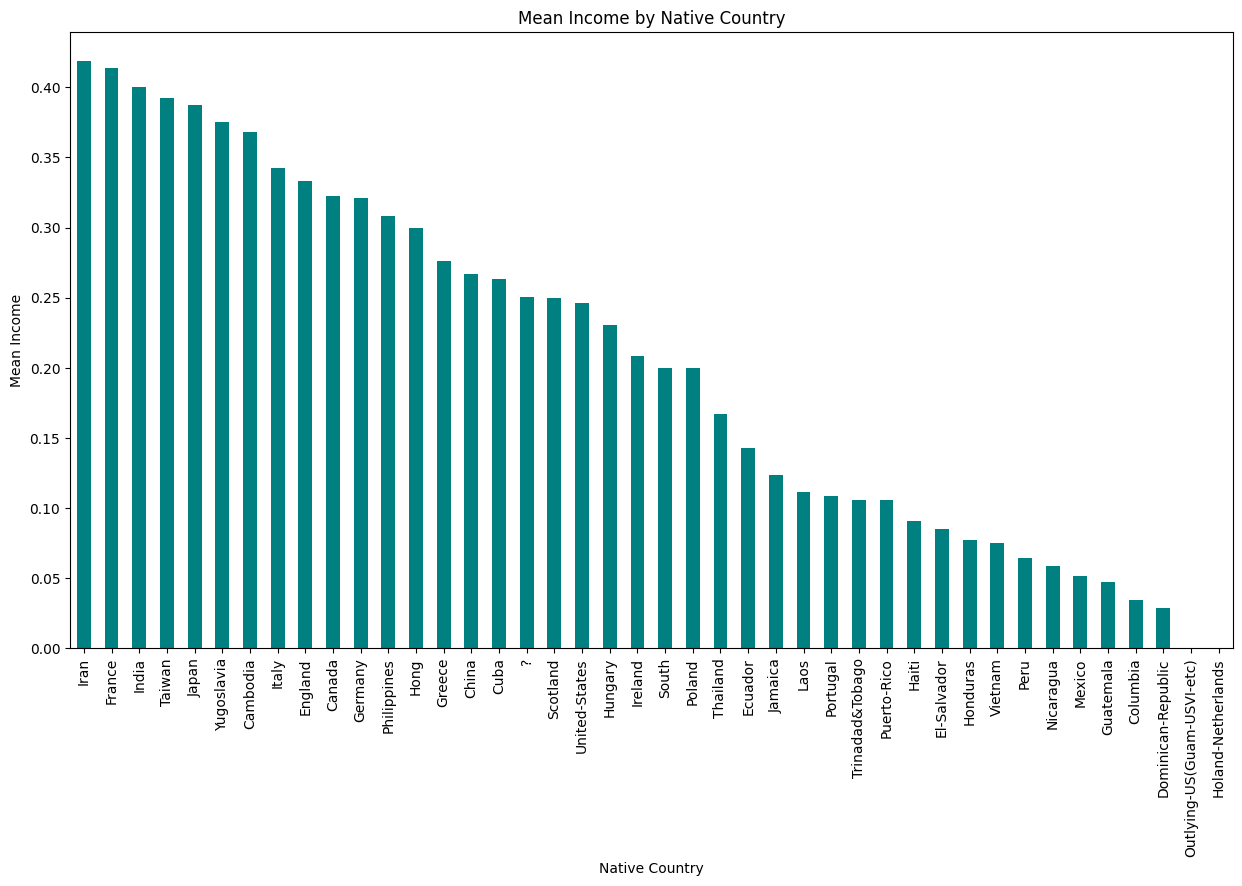

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"/content/dataset5_adult.csv")

data['income_num'] = data['income'].map({'<=50K': 0, '>50K': 1})

average_income = data.groupby('native.country')['income_num'].mean()

average_income = average_income.sort_values(ascending=False)

bar_color = 'teal'


plt.figure(figsize=(15, 8))
average_income.plot(kind='bar', color=bar_color)
plt.title('Mean Income by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Mean Income')
plt.show()


In [ ]:
highest_income = average_income.idxmax()
lowest_income = average_income.idxmin()

print(f'The country with the Highest Average Income: {highest_income}')
print(f'The country with the Lowest Average Income Country: {lowest_income}')


The country with the Highest Average Income: Iran
The country with the Lowest Average Income Country: Outlying-US(Guam-USVI-etc)


In [ ]:
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as mplt

data_set = pd.read_csv(r"C:\Users\Dell\Desktop\SDS_datathon\dataset5_adult.csv")

heatmap = pd.pivot_table(data_set, values='education.num', index='education', columns='occupation', aggfunc='count')

plt.figure(figsize=(12, 8))
sb.heatmap(pivot_table, cmap='PuRu', annot=True, fmt='g', linewidths=.5)
plt.title('Distribution of Education Levels Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Education Level')
plt.show()
